# Task 5 - Machine Learning Model

## Imports and Data Loading

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as met
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import plot_importance, XGBClassifier
%matplotlib inline

In [136]:
df = pd.read_csv('Dataset/2017_Taxi_Trip_Data.csv')
pd.set_option('display.max_columns', None)
df_nyc = pd.read_csv('Models/NYC_TLC_pred.csv')

In [137]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [138]:
df_nyc.head()

,Unnamed: 0,mean_duration,mean_distance,predicted_fare
0,0,22.85,3.52,16.162901
1,1,24.47,3.11,15.809750
2,2,7.25,0.88,6.998067
3,3,30.25,3.70,18.495842
4,4,14.62,4.44,15.986722


In [139]:
df_nyc.drop(columns=['Unnamed: 0'], inplace=True)
df = df.merge(df_nyc,left_index=True,right_index=True)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.85,3.52,16.162901
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.47,3.11,15.809750
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.25,0.88,6.998067
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.25,3.70,18.495842
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.62,4.44,15.986722


## Feature Engineering

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [141]:
df1 = df[df['payment_type']==1].copy()
df1['tip_percent'] = df1['tip_amount']/(df1['total_amount']-df1['tip_amount'])

In [142]:
df1['generous'] = (df1['tip_percent'] >= 0.2).astype(int)
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.85,3.52,16.162901,0.200000,1
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.47,3.11,15.809750,0.238095,1
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.25,0.88,6.998067,0.198630,0
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.25,3.70,18.495842,0.300000,1
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.86,2.05,10.225339,0.200000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.02,5.70,19.564730,0.199507,0
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.10,1.06,7.205592,0.200000,0
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.56,18.76,52.000000,0.250000,1
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.65,2.08,11.565668,0.150442,0


In [143]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().astype('str')

In [144]:
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour
cond1 = df1['am_rush'].between(6,10,inclusive='left')
df1['am_rush'] = np.where(cond1,1,0)

df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour
cond2 = df1['daytime'].between(10,16,inclusive='left')
df1['daytime'] = np.where(cond2,1,0)

df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour
cond3 = df1['pm_rush'].between(16,20,inclusive='left')
df1['pm_rush'] = np.where(cond3,1,0)

df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour
cond4 = (df1['nighttime']<6) | (df1['nighttime']>=20)
df1['nighttime'] = np.where(cond4,1,0)
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.85,3.52,16.162901,0.200000,1,Saturday,1,0,0,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.47,3.11,15.809750,0.238095,1,Tuesday,0,1,0,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.25,0.88,6.998067,0.198630,0,Friday,1,0,0,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.25,3.70,18.495842,0.300000,1,Sunday,0,1,0,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.86,2.05,10.225339,0.200000,1,Saturday,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,2017-07-16 03:22:51,2017-07-16 03:40:52,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.02,5.70,19.564730,0.199507,0,Sunday,0,0,0,1
22693,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.10,1.06,7.205592,0.200000,0,Thursday,0,0,0,1
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.56,18.76,52.000000,0.250000,1,Sunday,0,0,1,0
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.65,2.08,11.565668,0.150442,0,Saturday,0,1,0,0


In [145]:
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name().astype(str)
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.85,3.52,16.162901,0.200000,1,Saturday,1,0,0,0,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.47,3.11,15.809750,0.238095,1,Tuesday,0,1,0,0,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.25,0.88,6.998067,0.198630,0,Friday,1,0,0,0,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.25,3.70,18.495842,0.300000,1,Sunday,0,1,0,0,May
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.86,2.05,10.225339,0.200000,1,Saturday,0,0,0,1,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,2017-07-16 03:22:51,2017-07-16 03:40:52,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.02,5.70,19.564730,0.199507,0,Sunday,0,0,0,1,July
22693,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.10,1.06,7.205592,0.200000,0,Thursday,0,0,0,1,August
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.56,18.76,52.000000,0.250000,1,Sunday,0,0,1,0,August
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.65,2.08,11.565668,0.150442,0,Saturday,0,1,0,0,July


In [146]:
col = ['Unnamed: 0','tpep_pickup_datetime','tpep_dropoff_datetime','payment_type','trip_distance','store_and_fwd_flag','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','tip_percent']
df1 = df1.drop(col,axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int32  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int32  
 11  daytime          15265 non-null  int32  
 12  pm_rush          15265 non-null  int32  
 13  nighttime        15265 non-null  int32  
 14  month            15265 non-null  object 
dtypes: float64(3), int32(5), int64(5), object(2)
memory usage: 1.6+ MB


In [147]:
col = ['RatecodeID','PULocationID','DOLocationID','VendorID']
for cols in col:
    df1[col] = df1[col].astype('str')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  object 
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  object 
 3   PULocationID     15265 non-null  object 
 4   DOLocationID     15265 non-null  object 
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int32  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int32  
 11  daytime          15265 non-null  int32  
 12  pm_rush          15265 non-null  int32  
 13  nighttime        15265 non-null  int32  
 14  month            15265 non-null  object 
dtypes: float64(3), int32(5), int64(1), object(6)
memory usage: 1.6+ MB


In [148]:
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_September
dtypes: bool(338), float64(3), int32(5), int64(1)
memory usage: 5.8 MB


In [149]:
df1['generous'].value_counts()

generous
0    9944
1    5321
Name: count, dtype: int64

## Modelling

In [150]:
Y = df2['generous']
X = df2.drop(['generous'],axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, stratify=Y,test_size=0.6, random_state=69)

In [151]:
rfc = RandomForestClassifier(random_state=69)
cv_para = {'max_depth':[None],'min_samples_split':[2],'min_samples_leaf':[1],'max_features':[1.0],'max_samples':[0.7],'n_estimators':[300]}
score = 'accuracy','precision','recall','f1'
rfc1 = GridSearchCV(rfc, cv_para, scoring=score, cv=8, refit='f1')

In [152]:
rfc1.fit(xtrain, ytrain)

GridSearchCV(cv=8, estimator=RandomForestClassifier(random_state=69),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [153]:
import joblib
from joblib import Parallel, delayed

joblib.dump(rfc1, 'Models/NYC_TLC_rfc_model.pkl')

['Models/NYC_TLC_rfc_model.pkl']

In [154]:
rfc1.best_score_

0.33492370693301765

In [155]:
rfc1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [156]:
def get_res(model_name:str, model_object, metric:str):
    metric_dict = {'accuracy':'mean_test_accuracy','precision':'mean_test_precision','recall':'mean_test_recall','f1':'mean_test_f1'}
    cv_res = pd.DataFrame(model_object.cv_results_)
    best_est_res = cv_res.iloc[cv_res[metric_dict[metric]].idxmax(), :]
    f1 = best_est_res.mean_test_f1
    recall = best_est_res.mean_test_recall
    precision = best_est_res.mean_test_precision
    accuracy = best_est_res.mean_test_accuracy
    table = pd.DataFrame({'Model':[model_name],'Precision':[precision],'Recall':[recall],'F1':[f1],'Accuracy':[accuracy]},)
    return table
res = get_res('RF CV',rfc1,'f1')
res

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.442856,0.269737,0.334924,0.626928


In [157]:
pred = rfc1.best_estimator_.predict(xtest)
def get_test_score(model_name:str, pred, ytestdata):
    acc = met.accuracy_score(ytestdata,pred)
    prec = met.precision_score(ytestdata,pred)
    rec = met.recall_score(ytestdata,pred)
    f1 = met.f1_score(ytestdata,pred)
    table = pd.DataFrame({'Model':[model_name],'Precision':[prec],'Recall':[rec],'F1':[f1],'Accuracy':[acc]})
    return table
rf_test = get_test_score('RF Test',pred,ytest)
res = pd.concat([res,rf_test],axis=0)
res

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.442856,0.269737,0.334924,0.626928
0,RF Test,0.462211,0.281553,0.349942,0.635331


In [158]:
xgb = XGBClassifier(objective='binary:logistic',random_state=69)
cv_para = {'max_depth':[8],'learning_rate':[0.3],'min_child_weight':[2],'n_estimators':[500]}
score = 'accuracy','precision','recall','f1'
xgb1 = GridSearchCV(xgb,cv_para,scoring=score,cv=8,refit='f1')
xgb1.fit(xtrain,ytrain)

GridSearchCV(cv=8,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=69, ...),
             param_grid={'learning_rate': [0.3], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [159]:
xgb1.best_score_

0.3870883211709806

In [160]:
xgb1.best_params_

{'learning_rate': 0.3,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [161]:
xgb1_cv_res = get_res('XGB CV',xgb1,'f1')
res = pd.concat([res,xgb1_cv_res],axis=0)
res

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.442856,0.269737,0.334924,0.626928
0,RF Test,0.462211,0.281553,0.349942,0.635331
0,XGB CV,0.426000,0.355263,0.387088,0.608421


In [162]:
pred = xgb1.best_estimator_.predict(xtest)
xgb_test_score = get_test_score('XGB Test',pred,ytest)
res = pd.concat([res,xgb_test_score],axis=0)
res

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.442856,0.269737,0.334924,0.626928
0,RF Test,0.462211,0.281553,0.349942,0.635331
0,XGB CV,0.426000,0.355263,0.387088,0.608421
0,XGB Test,0.419703,0.353586,0.383818,0.604214


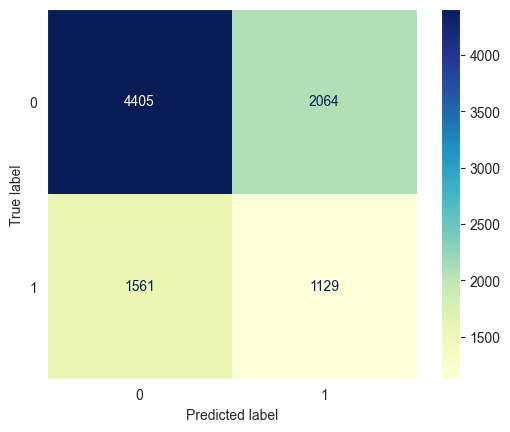

In [175]:
cm = met.confusion_matrix(pred,ytest,labels=xgb1.classes_)
dis = met.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb1.classes_,)
dis.plot(cmap='YlGnBu')
plt.grid(False)

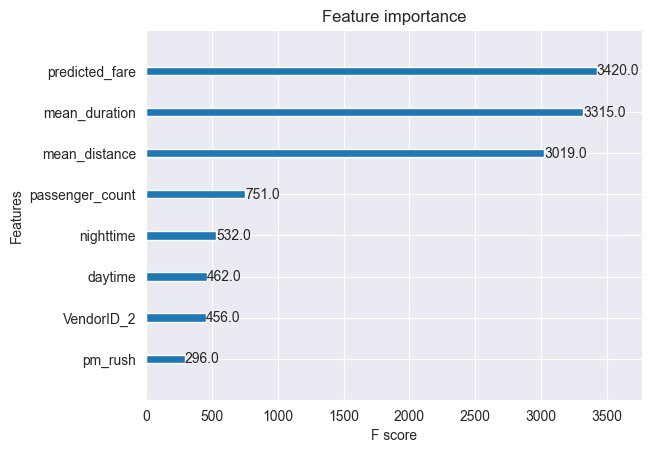

In [177]:
plot_importance(xgb1.best_estimator_,max_num_features=8)
plt.show()